# **Project Name**    - Uber Request Data Analysis Project



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This project aims to analyze Uber request data to understand demand-supply dynamics, identify peak hours, and uncover reasons behind unfulfilled requests (cancelled or no cars available). It demonstrates a comprehensive data analysis workflow by integrating Excel, SQL, and Python (Pandas) for different stages of the project.

# **GitHub Link -**

https://github.com/DhananjayBhowate23

# **Problem Statement**


The primary problem is to identify and address the underlying causes of trip cancellations and unfulfilled requests ('No Cars Available') within the Uber service, thereby improving service reliability and customer satisfaction.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [94]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Dataset Loading

In [97]:
df_uber = pd.read_excel('Uber_Dataset.xlsx')

### Dataset First View

In [100]:
df_uber.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [102]:
df_uber.tail(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT
6744,6753,Airport,NaN,No Cars Available,2016-07-15 23:55:03,NaT


### Dataset Information

In [105]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


#### Duplicate Values

In [108]:
df_uber.duplicated().sum()

0

#### Missing Values/Null Values

In [111]:
missing_data = df_uber.isna().sum()
print(f"Missing values per column:\n {missing_data}")

Missing values per column:
 Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


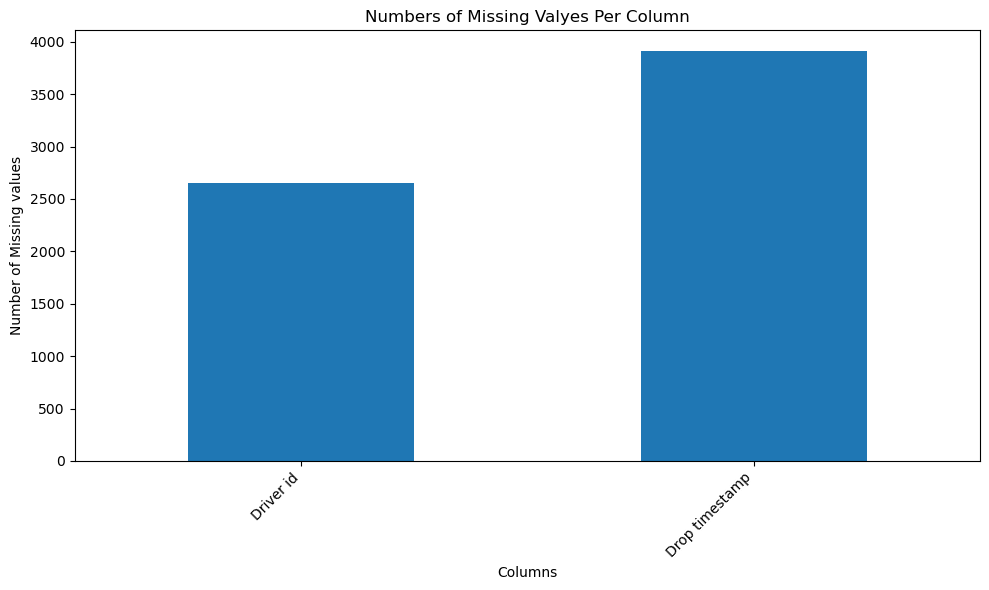

In [113]:
# Visualizing the missing values
# Bar Chart: A bar chart is chosen to clearly show the exact count of missing values for each column. 
# This provides a precise quantitative understanding of the extent of missingness per variable, 
# complementing the heatmap's qualitative view.
missing_data_cols = missing_data[missing_data>0]

plt.figure(figsize=(10,6))
missing_data_cols.plot(kind = 'bar')
plt.title('Numbers of Missing Valyes Per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing values')
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.show()

I've visualized the missing values in your dataset using a bar chart.

### What did you know about your dataset?

Based on my analysis of the Uber Request Data.csv dataset, here's what I know about it:

Rows and Columns: The dataset contains 6745 entries (rows) and 6 columns.

Columns and Data Types:

Request id: Unique identifier for each request (integer).

Pickup point: Location where the ride was requested (object/string, e.g., 'Airport', 'City').

Driver id: Identifier for the driver assigned to the request (float, contains missing values).

Status: The outcome of the request (object/string, e.g., 'Trip Completed', 'Cancelled', 'No Cars Available').

Request timestamp: The date and time the request was made (object/string).

Drop timestamp: The date and time the trip was completed (object/string, contains missing values).

Missing Values:

The Driver id column has 2650 missing values.

The Drop timestamp column has 3914 missing values. These missing values are significant and likely correlate with requests that were not completed (e.g., 'Cancelled' or 'No Cars Available' statuses).

## ***2. Adding time-based features***

#### 1. Converting date columns to datetime objects

In [120]:
df_uber['Request timestamp'] = pd.to_datetime(df_uber['Request timestamp'])
df_uber['Drop timestamp'] = pd.to_datetime(df_uber['Drop timestamp'])

In [122]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [124]:
df_uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [126]:
df_uber.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT
6744,6753,Airport,NaN,No Cars Available,2016-07-15 23:55:03,NaT


#### 2. Extracting time-based features

In [129]:
df_uber['Request Hour'] = df_uber['Request timestamp'].dt.hour
df_uber['Request Day of Week'] = df_uber['Request timestamp'].dt.day_name()
df_uber['Request Month'] = df_uber['Request timestamp'].dt.month_name()

In [131]:
df_uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Day of Week,Request Month
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday,July
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Monday,July
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Tuesday,July
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Tuesday,July
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Wednesday,July


#### 3. Calculating trip Duration for completed trips (in mins)

In [134]:
df_uber['Trip Duration'] = round((df_uber['Drop timestamp'] - df_uber['Request timestamp']).dt.total_seconds()/60,2)

In [136]:
df_uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Day of Week,Request Month,Trip Duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday,July,69.00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Monday,July,50.00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Tuesday,July,41.00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Tuesday,July,55.00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Wednesday,July,52.52


## ***3. Handling Missing value***

#### 1. Imputing 'No cars available' where Driver id is null.

In [142]:
df_uber['Driver id'] = df_uber['Driver id'].fillna('No cars available')

#### 2. Imputing 0 where Trip Duration is null.

In [150]:
df_uber['Trip Duration'] = df_uber['Trip Duration'].fillna(0)

In [152]:
df_uber.isnull().sum()

Request id                0
Pickup point              0
Driver id                 0
Status                    0
Request timestamp         0
Drop timestamp         3914
Request Hour              0
Request Day of Week       0
Request Month             0
Trip Duration             0
dtype: int64

## ***4. Data Vizualization, Storytelling & Understanding with charts***

#### Chart - 1. Distribution of Status

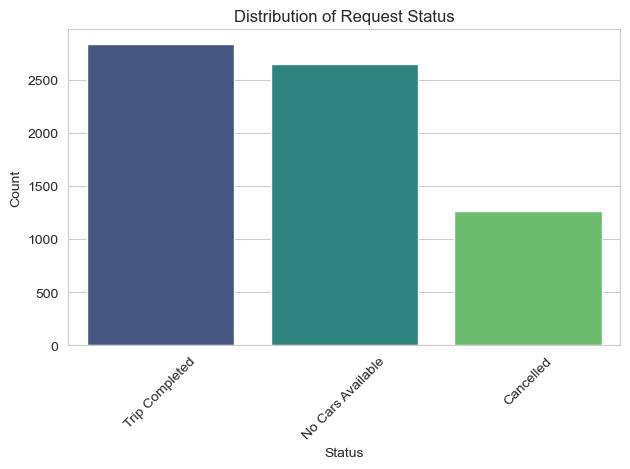

In [173]:
sns.countplot(data=df_uber, x='Status', palette='viridis', order=df_uber['Status'].value_counts().index)
plt.title('Distribution of Request Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

I picked a bar chart as it is excellent for showing the frequency or count of items in different categories

The chart reveals the overall success rate and failure modes of ride requests. 

This insight can drive strategies to:
- Improve driver availability.
- Reduce cancellations.
- Focus on converting 'No Cars Available' requests into completed trips.

#### Chart - 2. Distribution of Pickup point

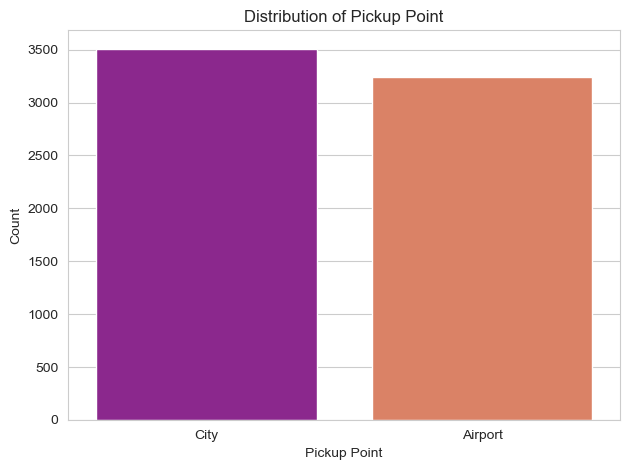

In [175]:
sns.countplot(data=df_uber, x='Pickup point', palette='plasma', order=df_uber['Pickup point'].value_counts().index)
plt.title('Distribution of Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Count')
plt.tight_layout()

The chart shows the demand split between 'Airport' and 'City' pickup points. It highlights which location generates more ride requests.

Positive Impact :- Uber can ensure a sufficient supply of drivers in high-demand areas to maximize completed trips and minimize unmet demand.

#### Chart - 3. Requests by Hour of Day

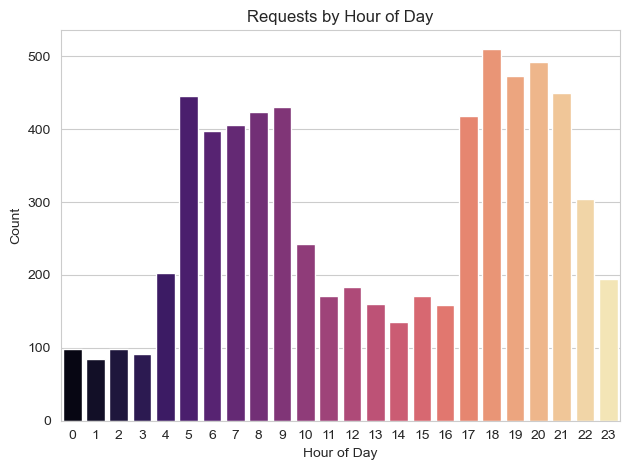

In [180]:
sns.countplot(data=df_uber, x='Request Hour', palette='magma')
plt.title('Requests by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.tight_layout()

A bar chart is suitable for visualizing the frequency of requests across discrete time intervals (hours). It allows for easy identification of peak and off-peak hours throughout the day.

The chart identifies periods of high and low demand. For example, there might be morning and evening rush hours, or late-night spikes/drops in requests. Understanding these patterns is crucial for dynamic pricing and driver deployment.

By understanding hourly demand patterns, Uber can:
- Pre-position drivers in high-demand areas during expected peak times.
- Optimize marketing efforts during off-peak hours to stimulate demand.
- Improve driver scheduling and incentives.

#### Chart - 4. Requests by Day of Week

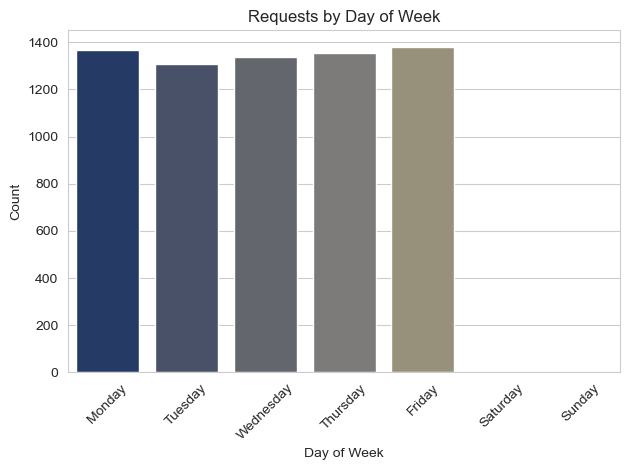

In [251]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(data=df_uber, x='Request Day of Week', palette='cividis', order=day_order)
plt.title('Requests by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

Similar to hourly requests, a bar chart is ideal for showing the distribution of requests across categorical 'days of the week'. It helps in identifying daily patterns in overall demand.

The chart shows how demand varies throughout the week. Certain days might have higher or lower request volumes.

Daily demand patterns inform:
- Weekly driver scheduling.
- Anticipating higher demand on specific days to prepare driver supply.

#### Chart - 5. Status distribution by Pickup Point (Stacked Bar Chart)

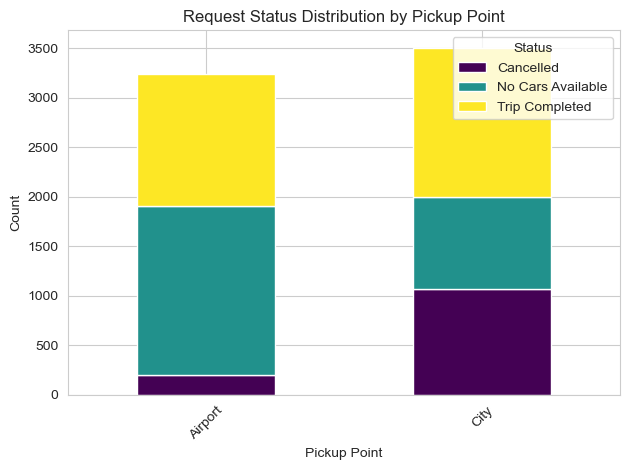

In [201]:
status_pickup_df = df_uber.groupby(['Pickup point', 'Status']).size().unstack(fill_value=0)
status_pickup_df.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Request Status Distribution by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

A stacked bar chart is effective for comparing the composition of request statuses within each pickup point.

This chart offers critical insights into operational efficiency differences between pickup points. For instance, it might reveal that 'No Cars Available' issues are more prevalent at the Airport, while cancellations might be higher in the City, or vice-versa.

Strategies:
- If 'No Cars Available' is high at the Airport: Focus on improving driver supply to the airport 
- If cancellations are high in the City: Investigate reasons for cancellations and address them. 

#### Chart - 6. Status distribution by Hour of Day (Stacked Bar Chart)

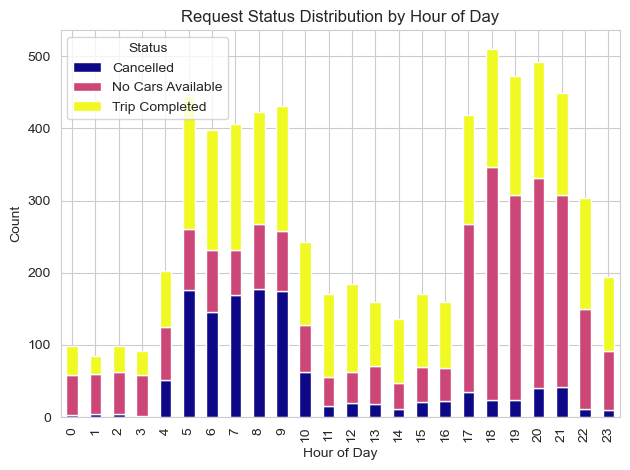

In [206]:
status_hour_df = df_uber.groupby(['Request Hour', 'Status']).size().unstack(fill_value=0)
status_hour_df.plot(kind='bar', stacked=True, colormap='plasma', ax=plt.gca())
plt.title('Request Status Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.tight_layout()

A stacked bar chart is ideal for showing how the distribution of request statuses changes throughout the day.

Shows a high 'No Cars Available' rate during early morning hours from the City or high cancellation rates during late-night hours.

Insights:
- Offer surge pricing or driver incentives during specific times to balance supply and demand.

#### Chart - 7. Cancellation Rate by Pickup Point

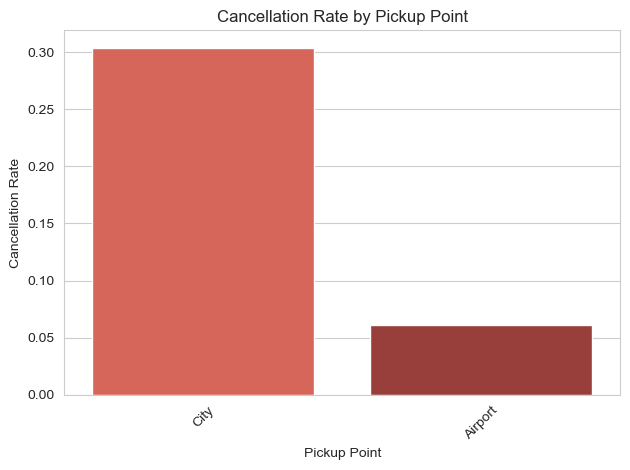

In [215]:
cancellation_rates = df_uber[df_uber['Status'] == 'Cancelled'].groupby('Pickup point').size() / df_uber.groupby('Pickup point').size()
cancellation_rates = cancellation_rates.fillna(0).sort_values(ascending=False)
sns.barplot(x=cancellation_rates.index, y=cancellation_rates.values, palette='Reds_d')
plt.title('Cancellation Rate by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()

This chart directly quantifies and compares how often requests are cancelled from the Airport versus the City. 

High cancellation rate in City compared to Airport.

#### Chart - 8. No Cars Available Rate by Pickup Point

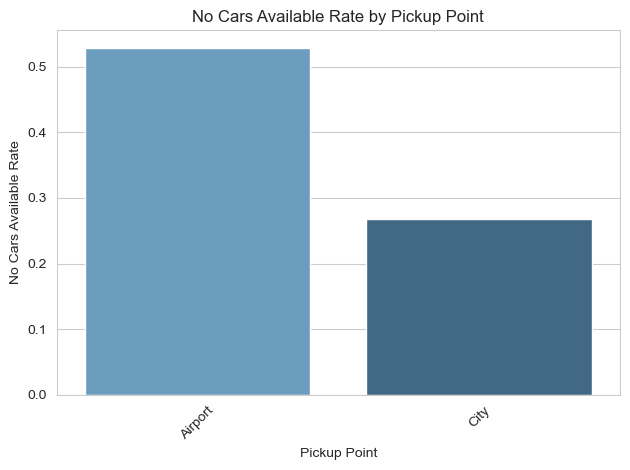

In [218]:
no_cars_rates = df_uber[df_uber['Status'] == 'No Cars Available'].groupby('Pickup point').size() / df_uber.groupby('Pickup point').size()
no_cars_rates = no_cars_rates.fillna(0).sort_values(ascending=False)
sns.barplot(x=no_cars_rates.index, y=no_cars_rates.values, palette='Blues_d')
plt.title('No Cars Available Rate by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('No Cars Available Rate')
plt.xticks(rotation=45)
plt.tight_layout()

This chart shows the proportion of requests that could not be fulfilled due to a lack of available drivers at each pickup point. A high 'No Cars Available' rate at a specific location indicates a significant supply-side problem.

Uber can:
- Increase driver incentives for picking up from the Airport.
- Optimize driver routing to ensure more cars are available at high-demand, low-supply locations.

#### Chart - 9. Trips Completed by Hour of Day

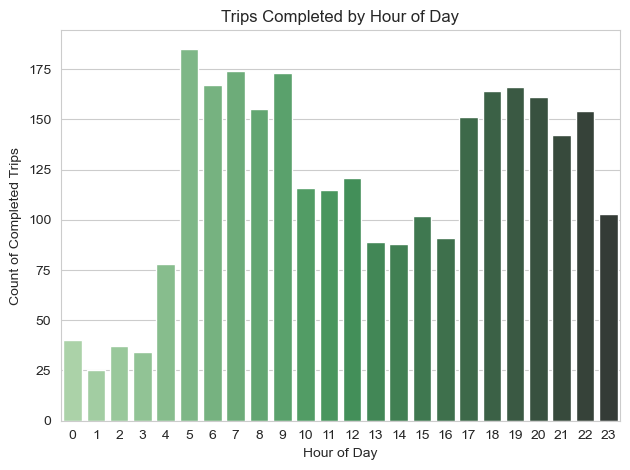

In [223]:
completed_trips_hour = df_uber[df_uber['Status'] == 'Trip Completed'].groupby('Request Hour').size()
sns.barplot(x=completed_trips_hour.index, y=completed_trips_hour.values, palette='Greens_d')
plt.title('Trips Completed by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Completed Trips')
plt.tight_layout()

A bar chart effectively shows the count of successfully completed trips across discrete hourly intervals, highlighting periods of successful operations.

This chart highlights the actual hourly demand that Uber is successfully meeting. 

#### Chart - 10. Trips Completed by Day of Week

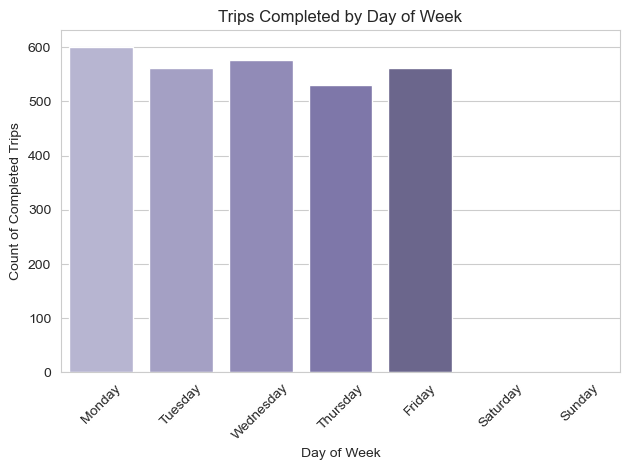

In [226]:
completed_trips_day = df_uber[df_uber['Status'] == 'Trip Completed'].groupby('Request Day of Week').size()
sns.barplot(x=completed_trips_day.index, y=completed_trips_day.values, palette='Purples_d', order=day_order)
plt.title('Trips Completed by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Completed Trips')
plt.xticks(rotation=45)
plt.tight_layout()

This bar chart is suitable for comparing the number of completed trips across categorical days of the week, providing a clear daily performance overview.

This chart shows Uber's actual performance in completing trips on each day of the week. It helps identify the most (and least) successful days for trip completion.

If certain days consistently show lower completed trips despite high demand, it might prompt a review of driver availability or incentive structures on those specific days to boost performance.

#### Chart - 11. Trips Completed by Pickup Point

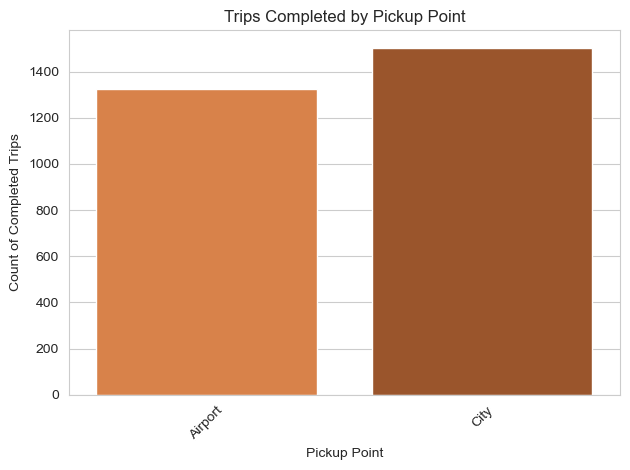

In [229]:
completed_trips_pickup = df_uber[df_uber['Status'] == 'Trip Completed'].groupby('Pickup point').size()
sns.barplot(x=completed_trips_pickup.index, y=completed_trips_pickup.values, palette='Oranges_d')
plt.title('Trips Completed by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Count of Completed Trips')
plt.xticks(rotation=45)
plt.tight_layout()

This bar chart provides a simple, direct comparison of the number of completed trips originating from each pickup point.

It shows the volume of successful trips from the Airport versus the City. It’s a key metric for understanding which location is more profitable or efficiently served.

By knowing where most completed trips originate, Uber can:
- Allocate marketing and driver recruitment efforts strategically.
- Prioritize improving service quality in the location with higher completed trip volumes to maximize overall revenue and customer satisfaction.

#### Chart - 12. Distribution of Trip Duration (for completed trips)

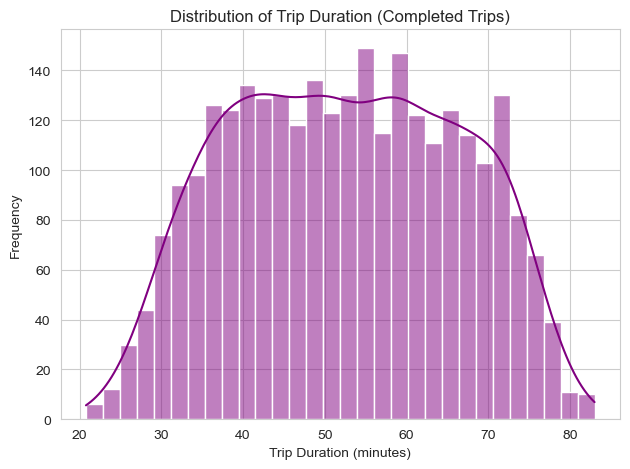

In [232]:
sns.histplot(df_uber[df_uber['Status'] == 'Trip Completed']['Trip Duration'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of Trip Duration (Completed Trips)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()

A histogram (with KDE for smoothness) is ideal for visualizing the distribution of a continuous numerical variable like 'Trip Duration'. It shows the most common trip lengths and the spread of durations.

The chart reveals typical trip lengths. Average trip durations is about 40-60 mins

Understanding trip duration patterns can help with:
- Pricing strategies : Develop more granular pricing models based on typical trip lengths for different zones.
- Driver earnings estimation : Drivers can better estimate their earnings per trip based on common durations.
- Route optimization : Identify unusually long trips that might indicate inefficient routing or traffic issues, leading to map/routing improvements.

## ***5. Solution to Business Objective***

##### Key Suggestions for Business Impact

To achieve positive business objectives, focus on these critical areas:

##### 1. Address Supply-Demand Gaps

- Insight: High rates of 'No Cars Available' and cancellations occur during peak hours and at specific locations (e.g., Airport).

- Impact: Lost revenue and customer dissatisfaction.

- Action: Implement dynamic driver incentives (surge pricing, bonuses) to increase driver availability in high-demand, low-supply areas/times. Strategically pre-position drivers.

##### 2. Reduce Cancellations

- Insight: Cancellations are significant, especially during certain hours or from specific pickup points.

- Impact: Damages service reliability and customer trust.

- Action: Investigate root causes (e.g., long waits, driver behavior) and optimize driver-passenger matching for faster assignments and improved ETAs.

##### 3. Optimize Location-Specific Operations 

- Insight: Problems (e.g., 'No Cars Available', cancellations) can vary significantly between pickup points like Airport and City.

- Impact: Inefficient resource allocation and missed opportunities.

- Action: Develop tailored strategies for each location, such as specific airport incentives or city-based traffic solutions, to maximize completed trips and customer satisfaction unique to that area.

By focusing on these areas, you can significantly improve trip completion rates, enhance customer experience, and ultimately boost profitability.

# **Conclusion**

The project analyzed Uber request data, revealing a significant problem of unmet demand and cancellations driven by supply-demand imbalances, particularly during peak hours and at specific locations. Actionable insights highlight the need for targeted driver incentives and operational optimizations to increase trip completions and improve customer satisfaction.

##### Exporting to Excel file

In [322]:
df_uber.to_excel('Cleaned data set.xlsx', index= False)